In [23]:
import pandas as pd

defender_data = pd.read_csv('data/LRD_data.csv')
defender_data.head()

,price_final,model_type,model_variant_final,ext_color_final,mileage_final,age,originality_final
0,49990.0,Land Rover Defender 90,90 Hard Top,Gray,0.000000e+00,33,Restored-Modified
1,91500.0,NAS 5-Speed,90 Soft Top,Green,6.300000e+04,28,Original & Highly Original
2,88995.0,5-Speed,110 Hard Top,Blue,1.560010e+10,31,Restored-Modified
3,57999.0,300TDI 5-Speed,110 Wagon,Blue,1.733625e+05,27,Restored-Original
4,112000.0,5-Speed,90 Soft Top,Black,1.030000e+05,29,Restored-Original


Handling some issues with mileage
--- Problems ---
1) Null, 0 vals --> del
2) Scraped and concactenated km + miles --> 15600096934 --> 156k km == 96k miles so change to 96,934 
3) Added decimal val --> 173362.509 should just be 173362 miles

In [24]:
def kmmiles_to_miles(mileage):
    mileage = str(int(mileage))
    m_len = len(mileage)

    if m_len<6:
        raise ValueError("int too small")
    elif m_len==6:
        new_mileage = int(mileage[3:])
    elif m_len==7 or m_len==8:
        new_mileage= int(mileage[4:])
    elif m_len == 9 or m_len==10:
        new_mileage = int(mileage[5:])
    elif m_len==11 or m_len==12:
        new_mileage = int(mileage[6:])
    else:
        raise ValueError("format not recognized")
    return new_mileage

In [25]:
for i, mileage in enumerate(defender_data['mileage_final']):
    if mileage > 500000:  # Handling concatenated km + miles
        try:
            new_mileage = kmmiles_to_miles(mileage)
        except ValueError:
            print(mileage)
        defender_data.at[i, 'mileage_final'] = new_mileage
    elif pd.isna(mileage) or mileage < 100:  
        defender_data.at[i, 'mileage_final'] = None
    else:
        defender_data.at[i, 'mileage_final'] = round(mileage)

defender_data.dropna(subset=['mileage_final'], inplace=True)
defender_data.head()

,price_final,model_type,model_variant_final,ext_color_final,mileage_final,age,originality_final
1,91500.0,NAS 5-Speed,90 Soft Top,Green,63000.0,28,Original & Highly Original
2,88995.0,5-Speed,110 Hard Top,Blue,96934.0,31,Restored-Modified
3,57999.0,300TDI 5-Speed,110 Wagon,Blue,173363.0,27,Restored-Original
4,112000.0,5-Speed,90 Soft Top,Black,103000.0,29,Restored-Original
6,43995.0,standard,90 Hard Top,White,152000.0,30,Restored-Original


Understanding data distribution

          price_final model_type model_variant_final ext_color_final  \
count      428.000000        428                 428             428   
unique            NaN         71                  12              14   
top               NaN   standard           110 Wagon           White   
freq              NaN         84                 111              92   
mean     67584.843458        NaN                 NaN             NaN   
std      32494.854326        NaN                 NaN             NaN   
min       5000.000000        NaN                 NaN             NaN   
25%      42937.500000        NaN                 NaN             NaN   
50%      62400.000000        NaN                 NaN             NaN   
75%      81625.000000        NaN                 NaN             NaN   
max     269950.000000        NaN                 NaN             NaN   

        mileage_final         age  originality_final  
count      428.000000  428.000000                428  
unique            NaN    

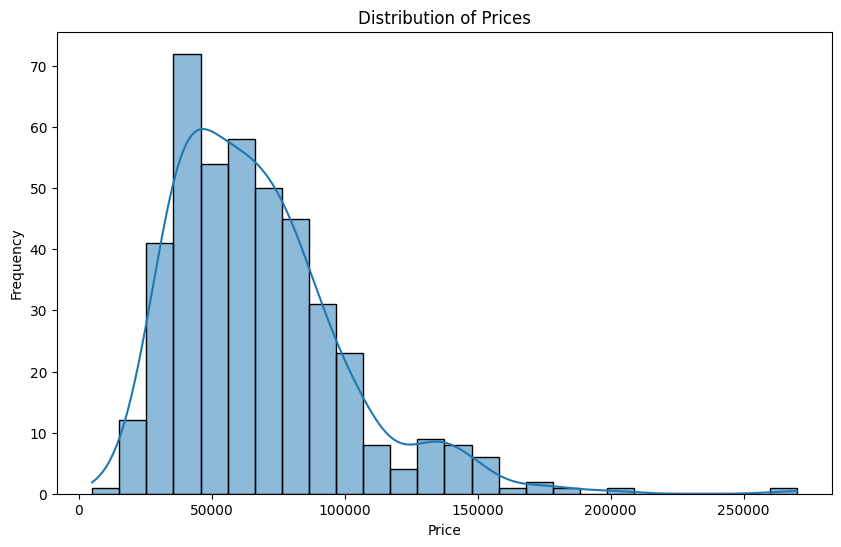

/Users/LukeHeitman/Desktop/getGood/LRD_Predictor/lrd/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


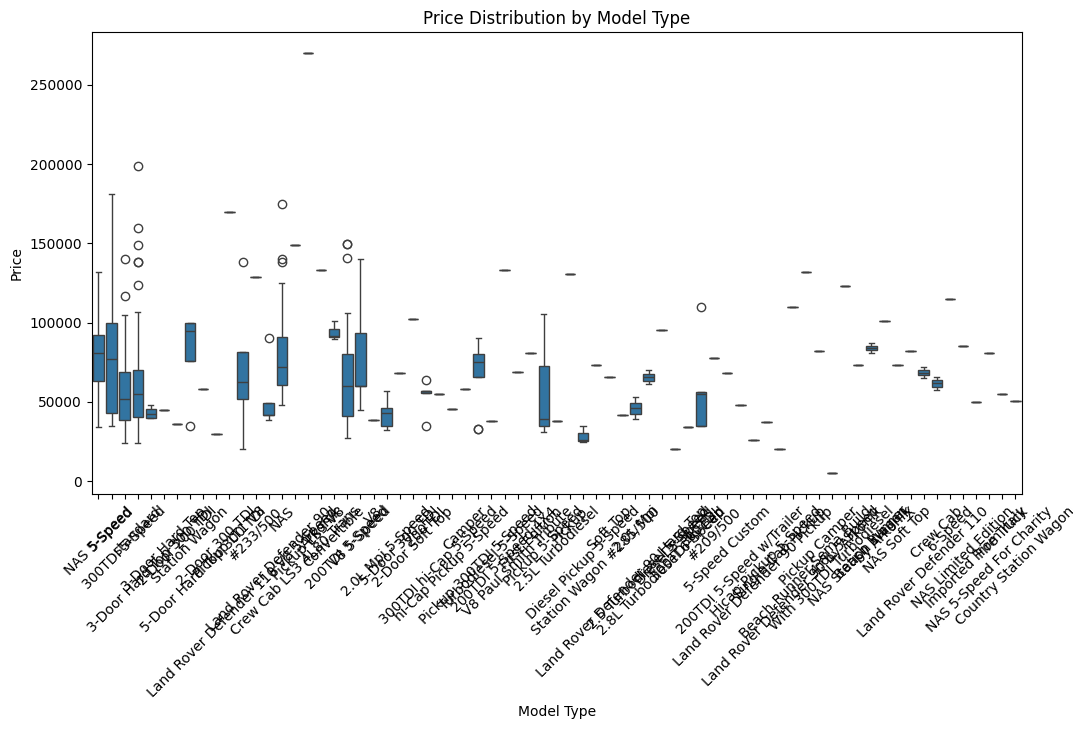

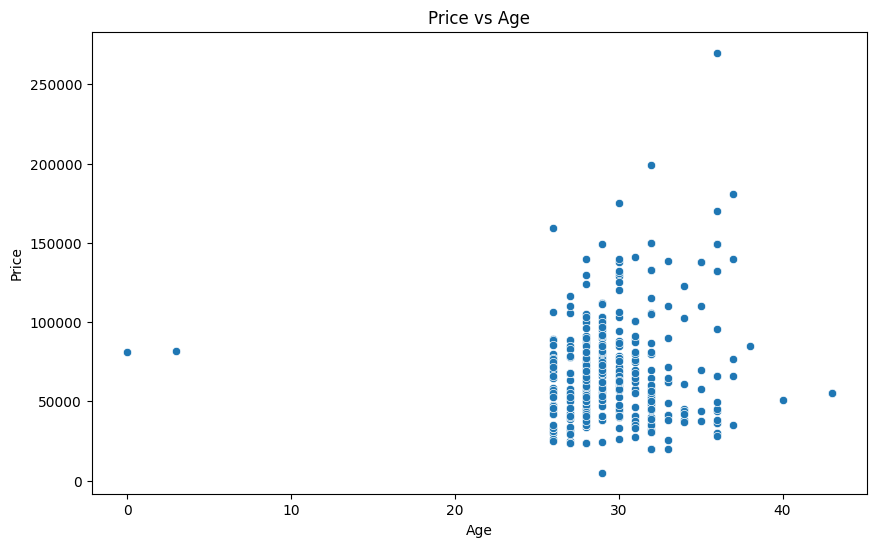

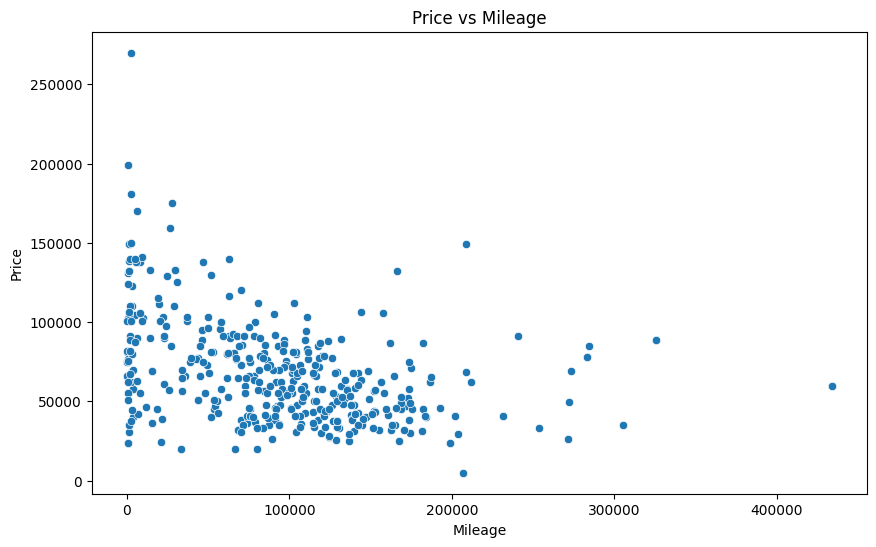

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(defender_data.describe(include='all'))
print(defender_data.info())

# Distribution of price
plt.figure(figsize=(10, 6))
sns.histplot(defender_data['price_final'], kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#  model type and price
plt.figure(figsize=(12, 6))
sns.boxplot(x='model_type', y='price_final', data=defender_data)
plt.xticks(rotation=45)
plt.title('Price Distribution by Model Type')
plt.xlabel('Model Type')
plt.ylabel('Price')
plt.show()

# Numerical Variable Analysis
# Example: Relationship between 'age' and 'price_final'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='price_final', data=defender_data)
plt.title('Price vs Age')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()
# Numerical Variable Analysis
# Example: Relationship between 'age' and 'price_final'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage_final', y='price_final', data=defender_data)
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

A couple of notes:

Age) All trucks are at least 25 y/o, doesnt look like theres any relationship between age and price
Price) Somewhat of a normal dist, some outliters at >150,000
Model) Need to standardize model names, too many names that mean the same things

Also, need to remove NAS trucks as I don't care about those.

TODO:

Standardize model names -->
    Remove NAS types -->

In [27]:
print("Unique Model Names Before Standardization:")
print(defender_data['model_type'].unique())

Unique Model Names Before Standardization:
['NAS 5-Speed' '5-Speed' '300TDI 5-Speed' 'standard'
 '3-Door Hard Top 300 TDI' '3-Door Hard Top' '2-Door 200 TDI'
 'Station Wagon' '5-Door Hard Top 300 TDI' '2-Door 300 TDI'
 'Pickup LT1 V8' 'Land Rover Defender 110 V8 5-Speed' '#233/500'
 'Land Rover Defender 90' 'NAS' 'Crew Cab LS3 4L80 Trans' 'Pickup LS3 V8'
 'Arkonik' 'Convertible' '200TDI 5-Speed' 'V8 5-Speed' 'V8'
 '2.0L Mpi 5-Speed' '5-Door 300 TDI' '2-Door Soft Top' '200TDI'
 '300TDI hi-Cap 5-Speed' 'hi-Cap Pickup 5-Speed' 'Camper'
 'Pickup 300TDI 5-Speed' 'Turbodiesel 5-Speed' '200TDI 5-Speed 4X4'
 'V8 Paul Smith Tribute' 'First Edition' 'Pickup 5-Speed'
 '2.5L Turbodiesel' 'Pickup' 'Diesel Pickup 5-Speed'
 'Station Wagon #285/500' 'Soft Top' 'Land Rover Defender 90 Hard Top'
 '2.0L Mpi' '2.5 Turbodiesel 5-Speed' '2.8L Turbodiesel 6-Speed'
 'Diesel 5-Speed' '300TDI hi-Cap' '300TDI' '#209/500' '5-Speed Custom'
 '200TDI 5-Speed w/Trailer' 'Land Rover Defender 90 Pickup'
 'Hicap Pickup 

In [28]:
defender_data['model_type'].value_counts()

model_type
standard                           84
300TDI 5-Speed                     66
NAS 5-Speed                        57
200TDI 5-Speed                     53
NAS                                30
                                   ..
Pickup                              1
Soft Top                            1
Land Rover Defender 90 Hard Top     1
2.8L Turbodiesel 6-Speed            1
Country Station Wagon               1
Name: count, Length: 71, dtype: int64

In [29]:
defender_data['model_variant_final'].value_counts()

model_variant_final
110 Wagon                  111
90 Soft Top                106
90 Hard Top                 96
90 Wagon                    32
110 Hard Top                20
110 Soft Top                16
130                         16
110 Pickup - Single Cab     13
90 Pickup                    9
110 Pickup - Double Cab      6
127                          2
110                          1
Name: count, dtype: int64

In [30]:
def standardize_model(model):
    model = model.strip().lower()
    # gets rid of special models or nas right away
    if model in ['nas', 'arkonik', 'ls', '#']:
        new_model = 'del'
    elif 'v8' in model:
        new_model= 'v8'
    elif model in ['200tdi','200 tdi']:
        new_model = '200tdi'
    elif model in ['300tdi','300 tdi']:
        new_model = '300tdi'
    elif '2.0' in model:
        new_model = 'gas'
    elif model in ['turbodiesel', 'td']:
        new_model = 'td'
    else:
        new_model = 'standard'
    return new_model

In [31]:
defender_data['model_type_standardized'] = defender_data['model_type'].apply(standardize_model)

In [32]:
defender_data = defender_data[defender_data['model_type_standardized'] != 'del']

/Users/LukeHeitman/Desktop/getGood/LRD_Predictor/lrd/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


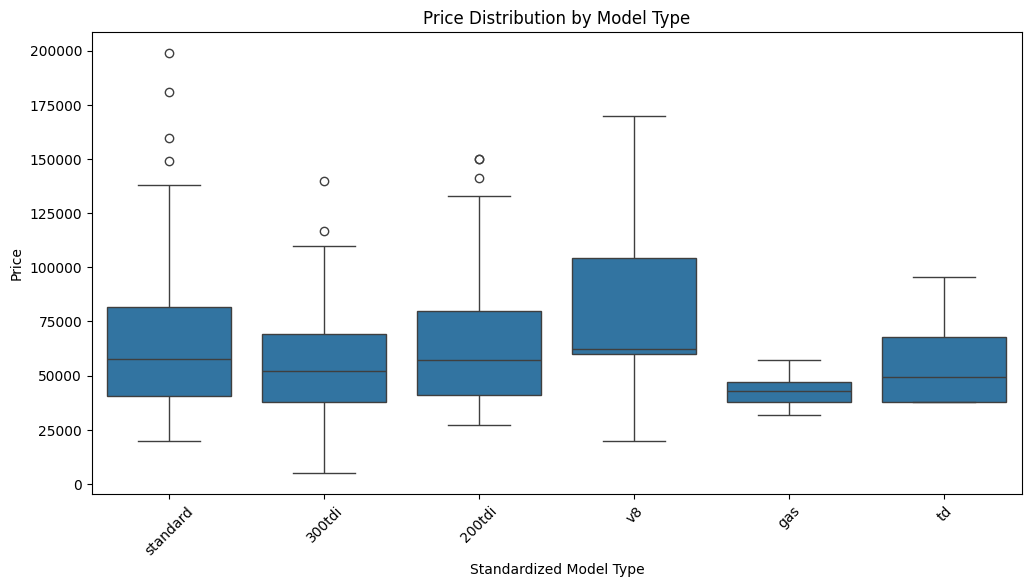

In [33]:
#  now revaluating model type and price relationship
plt.figure(figsize=(12, 6))
sns.boxplot(x='model_type_standardized', y='price_final', data=defender_data)
plt.xticks(rotation=45)
plt.title('Price Distribution by Model Type')
plt.xlabel('Standardized Model Type')
plt.ylabel('Price')
plt.show()

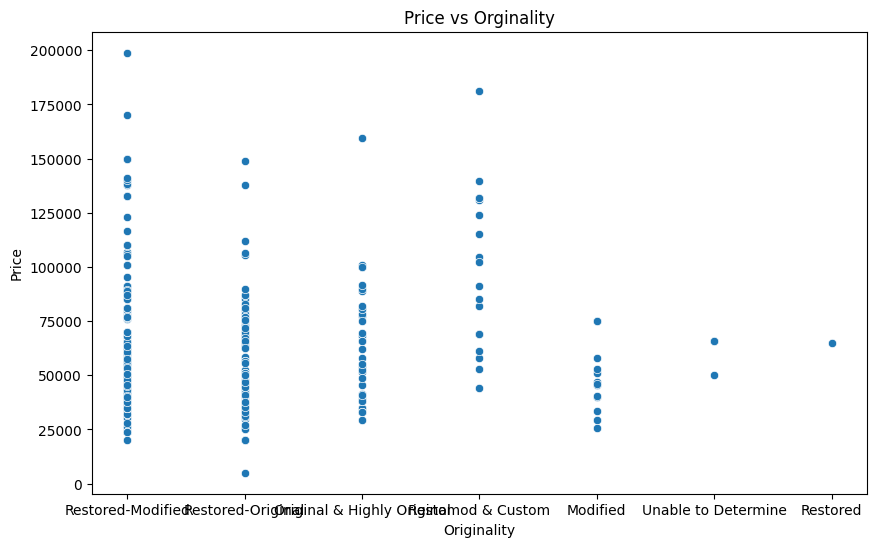

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='originality_final', y='price_final', data=defender_data)
plt.title('Price vs Orginality')
plt.xlabel('Originality')
plt.ylabel('Price')
plt.show()

Trying to find some relationship with age:
Is there a non-linear realtionship w/ price? Could square or cube age to capture
Combine age and mileage, i.e. miles/age 
age and originality

In [35]:
# scoring system with originality
originality_weights = {'Restored-Original': 1.0, 'Restored-Modified': 0.8, 'Original & Highly Original': 1.2, 'Modified': 0.6, 'Other': 0.5}
defender_data['age_originality_score'] = defender_data.apply(lambda x: x['age'] * originality_weights.get(x['originality_final'], 0), axis=1)

In [36]:
defender_data['age'].value_counts()

age
28    61
32    49
27    43
26    36
29    29
31    28
30    27
36    14
33    13
34     9
35     6
37     5
43     2
0      1
3      1
38     1
40     1
Name: count, dtype: int64

In [37]:
# Filtering out rows where age is 0, 3, 38, 40, or 43
defender_data = defender_data[~defender_data['age'].isin([0, 3, 38, 40, 43])]

In [38]:
defender_data['age'].value_counts()

age
28    61
32    49
27    43
26    36
29    29
31    28
30    27
36    14
33    13
34     9
35     6
37     5
Name: count, dtype: int64

Binning mileage

In [39]:
# bin_edges = [0, 50000, 100000, 150000, 200000, max(defender_data['mileage_final'])]
# bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
# defender_data['mileage_bins'] = pd.cut(defender_data['mileage_final'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# # Display the first few rows to verify the new column
# print(defender_data.head())

In [43]:
defender_data['ext_color_final'].value_counts()

ext_color_final
Green            63
Gray             61
White            54
Blue             44
Black            28
Red              23
Silver           10
Beige            10
Gold/Bronze       8
Yellow            7
Orange/Copper     7
Brown             3
Burgundy          1
Multicolor        1
Name: count, dtype: int64

In [45]:
def standardize_colors(color):
    color = color.lower()
    if color in ['gold', 'bronze', 'gold/bronze', 'brown','orange', 'copper', 'orange/copper', 'beige','burgundy']:
        return 'brown_orange_gold'
    elif color in ['multicolor']:
        return 'del'
    else:
        return color

In [46]:
defender_data['color_standardized'] = defender_data['ext_color_final'].apply(standardize_colors)
defender_data = defender_data[defender_data['color_standardized'] != 'del']

In [48]:
defender_data['color_standardized'].value_counts()

color_standardized
green                63
gray                 61
white                54
blue                 44
brown_orange_gold    29
black                28
red                  23
silver               10
yellow                7
Name: count, dtype: int64

In [49]:
defender_data['model_variant_final'].value_counts()

model_variant_final
90 Hard Top                95
110 Wagon                  89
90 Soft Top                43
110 Hard Top               19
90 Wagon                   16
110 Soft Top               16
130                        15
110 Pickup - Single Cab    12
90 Pickup                   9
110 Pickup - Double Cab     3
127                         2
Name: count, dtype: int64

In [50]:
def standardize_model_variant(model_variant):
    model_variant = model_variant.strip().lower()
    if '90' in model_variant:
        if 'pickup' in model_variant:
            return '90 pickup'
        elif 'soft top' in model_variant:
            return '90 soft top'
        else:
            return '90 standard'
    elif '110' in model_variant:
        if 'pickup' in model_variant:
            return '110 pickup'
        elif 'soft top' in model_variant:
            return '110 soft top'
        else:
            return '110 standard'
    else:
        return 'del'

In [51]:
defender_data['variant_standardized'] = defender_data['model_variant_final'].apply(standardize_model_variant)
defender_data = defender_data[defender_data['variant_standardized'] != 'del']

/var/folders/4v/hcqt1p7s1859vr42874pyy8r0000gn/T/ipykernel_88119/168897671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defender_data['variant_standardized'] = defender_data['model_variant_final'].apply(standardize_model_variant)


In [53]:
# drop model_type, model_variant_final, ext_color_final
defender_data = defender_data.drop(['model_type', 'model_variant_final', 'ext_color_final'], axis=1)

In [55]:
defender_data

,price_final,mileage_final,age,originality_final,model_type_standardized,age_originality_score,color_standardized,variant_standardized
2,88995.0,96934.0,31,Restored-Modified,standard,24.8,blue,110 standard
3,57999.0,173363.0,27,Restored-Original,300tdi,27.0,blue,110 standard
4,112000.0,103000.0,29,Restored-Original,standard,29.0,black,90 soft top
6,43995.0,152000.0,30,Restored-Original,standard,30.0,white,90 standard
7,39999.0,146786.0,28,Restored-Original,300tdi,28.0,green,90 standard
...,...,...,...,...,...,...,...,...
476,124000.0,650.0,28,Restomod & Custom,standard,0.0,brown_orange_gold,110 standard
479,55000.0,8146.0,31,Original & Highly Original,standard,37.2,red,110 standard
480,75500.0,800.0,30,Restored-Original,200tdi,30.0,red,110 standard
481,53000.0,132352.0,28,Restomod & Custom,gas,0.0,blue,90 soft top


In [57]:
# encode non numerical features
defender_data_encoded = pd.get_dummies(defender_data, columns=['originality_final', 'model_type_standardized', 'color_standardized', 'variant_standardized']).astype(int)

   price_final  mileage_final  age  age_originality_score  \
2        88995          96934   31                     24   
3        57999         173363   27                     27   
4       112000         103000   29                     29   
6        43995         152000   30                     30   
7        39999         146786   28                     28   

   originality_final_Modified  originality_final_Original & Highly Original  \
2                           0                                             0   
3                           0                                             0   
4                           0                                             0   
6                           0                                             0   
7                           0                                             0   

   originality_final_Restomod & Custom  originality_final_Restored  \
2                                    0                           0   
3                 

In [63]:
defender_data_encoded.to_csv('cleaned_defender_data.csv', index=False)